In [1]:
#Remove duplicates 
from collections import OrderedDict
file = open("cleaned_reddit.csv")
d = OrderedDict()
for line in file:
    line = line.strip("\n")
    l = line.split(",")
    d[l[0]] = [l[1], l[2]]
seen =[]
dd = list(d.keys())
dd.sort(key=len, reverse=True)
for i in dd:
    for j in dd:
        if i != j and i in j and i not in seen and j not in seen:
            seen.append(i)

            d[i] = [int(d[i][0])-int(d[j][0]), int(d[i][1])-int(d[j][1])]
file2 = open("cleaned_reddit_duplicates_stripped.csv", "w+")
for i in d.keys():
    s = ""
    s = i+","+str(d[i][0])+","+str(d[i][1])+"\n"
    #print(s)
    
    file2.write(s)

In [2]:
import pandas as pd
import numpy as np

f = pd.read_csv("cleaned_reddit_duplicates_stripped.csv")
print(f["Positive"].mean(), f["Positive"].median())
print(f["Negative"].mean(), f["Negative"].median())


250.19654427645787 8.0
137.26565874730022 4.0


A quick look at the flavors with the most positive refrences 

In [3]:
f.sort_values(["Positive"], ascending=[False]).head()

,Flavor Name,Positive,Negative
162,strawberry,18263,4732
260,caramel,10030,5130
156,raspberry,6619,2592
268,banana,5026,2807
352,tobacco,4445,2070


A quick look at the flavors with the most negative refrences

In [4]:
f.sort_values(["Negative"], ascending=[False]).head()

,Flavor Name,Positive,Negative
342,watermelon,2320,5248
260,caramel,10030,5130
162,strawberry,18263,4732
368,coconut,3178,3608
268,banana,5026,2807


Raw numbers are nice, but the most commonly mentioned flavors drown out everything else. Why not use percent instead? First Adding a total column to make life easier.

Positive Percent is positive mentions / total mentions

Negative Percent is negative mentions / total mentions


In [5]:
f["Total"] = f["Positive"]+f["Negative"]
f["Difference"] = f["Positive"] - f["Negative"]

In [6]:
f["Percent_Positive"] = f["Positive"]/f["Total"]
f.sort_values(["Percent_Positive", "Total"], ascending=[False, False]).head()

,Flavor Name,Positive,Negative,Total,Difference,Percent_Positive
13,vanilla butter,-10,6,-4,-16,2.5
243,cap vanilla custard,-4,2,-2,-6,2.0
250,cinnamon danish,53,0,53,53,1.0
167,chocolate cream,27,0,27,27,1.0
317,caramel original,20,0,20,20,1.0


Here we have sorted the most positive flavors for their percent rating and total rating. We can see Cinnamon Danish is the "most positive" flavor in the data set. 

In [7]:
f["Percent_Negative"] = f["Negative"]/f["Total"]

f.sort_values(["Percent_Negative", "Total"], ascending=[False, False]).head()

,Flavor Name,Positive,Negative,Total,Difference,Percent_Positive,Percent_Negative
240,caramel candy,0,30,30,-30,0.0,1.0
267,yougurt,0,22,22,-22,0.0,1.0
169,yumberry,0,13,13,-13,0.0,1.0
164,white out,0,8,8,-8,0.0,1.0
233,apple sour,0,8,8,-8,0.0,1.0


We have sorted the most negative flavors in the same manner we sorted positive flavors. We can see Caramel Candy is the "most negative" flavor followed closely by yougurt.

Finally, some quick figures.


1


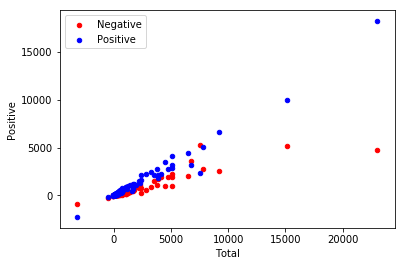

In [8]:
%matplotlib inline
print(1)
ax = f.plot.scatter(x='Total', y='Negative', color='Red', label='Negative')
f.plot.scatter(x='Total', y='Positive', color='Blue', label='Positive', ax=ax);

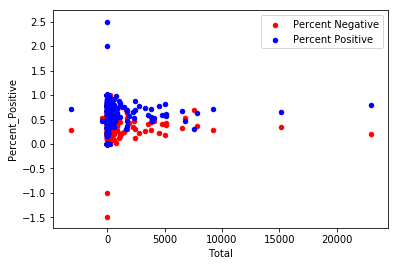

In [9]:
ax = f.plot.scatter(x='Total', y='Percent_Negative', color='Red', label='Percent Negative')
f.plot.scatter(x='Total', y='Percent_Positive', color='Blue', label='Percent Positive', ax=ax);

Here we remove the highest values so generate some clearer figures.

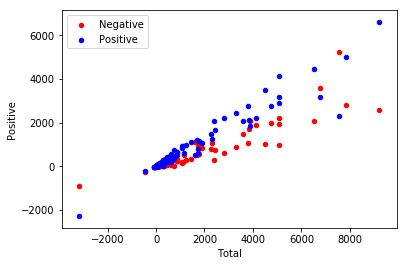

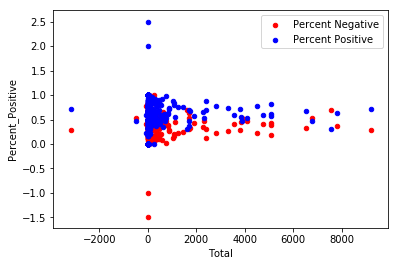

In [10]:
f = f[f["Positive"] < 10000]
f["Total"] = f["Positive"]+f["Negative"]
f["Percent_Positive"] = f["Positive"]/f["Total"]
f["Percent_Negative"] = f["Negative"]/f["Total"]

ax = f.plot.scatter(x='Total', y='Negative', color='Red', label='Negative')
f.plot.scatter(x='Total', y='Positive', color='Blue', label='Positive', ax=ax);


ax = f.plot.scatter(x='Total', y='Percent_Negative', color='Red', label='Percent Negative')
f.plot.scatter(x='Total', y='Percent_Positive', color='Blue', label='Percent Positive', ax=ax);

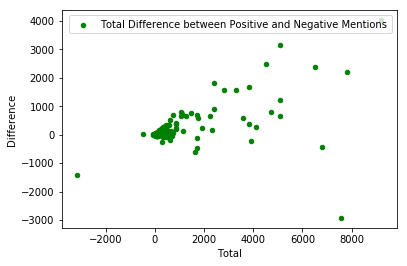

In [11]:
f.plot.scatter(x='Total', y='Difference', color='Green', label='Total Difference between Positive and Negative Mentions');

In [18]:
from scipy.stats import ranksums, mannwhitneyu, chisquare #return stat, pval so use list slices to select which one
from math import log
for i in list(f.columns.values):
    if i != "Flavor Name":
        chi, p = chisquare(f[i])
        print(f"""Chi Test Statistic: {chi}, p-score: {p}""")

"""
rank_f = {j: {} for j in f["Flavor Name"]}
mann_f= {j: {} for j in f["Flavor Name"]}
flavors = f["Flavor Name"].tolist()
for i in list(f.columns.values):
    if i != "Flavor Name":
        vals = f[i].tolist()
        for j in range(len(vals)):
            rank_f[flavors[j]][i] = ranksums(f[i], [vals[j]])[0] #toggle 0: stat, 1: pval 
            mann_f[flavors[j]][i] = mannwhitneyu(f[i], [vals[j]])[0]
            
print(rank_f['cap vanilla custard v'])
mann_f_file = open("mann_f_duplicates_dict_stat.csv", "w+")
rank_f_file = open("rank_f_duplicates_dict_stat.csv", "w+")
s = ""

for i in list(f.columns.values):
    s+=i
    s+=","
s = s[:-1]
s+="\n"
mann_f_file.write(s)
rank_f_file.write(s)
t_m = ""
t_r = ""
for i in flavors:
    t_m+=i
    t_m+=","
    t_r+=i
    t_r+=","
    for k in list(f.columns.values):
        if k != "Flavor Name":
            t_m+=str(mann_f[i][k])
            t_m+=","
            t_r+=str(rank_f[i][k])
            t_r+=","
    t_r = t_r[:-1]
    t_m = t_m[:-1]
    t_r+="\n"
    t_m+="\n"
    mann_f_file.write(t_m)
    rank_f_file.write(t_r)

rank_f_file.close()
mann_f_file.close()
"""



Chi Test Statistic: 1103694.4930780828, p-score: 0.0
Chi Test Statistic: 800647.2432764655, p-score: 0.0
Chi Test Statistic: 1737732.163707165, p-score: 0.0
Chi Test Statistic: 998106.797318053, p-score: 0.0
Chi Test Statistic: nan, p-score: nan
Chi Test Statistic: nan, p-score: nan


'\nrank_f = {j: {} for j in f["Flavor Name"]}\nmann_f= {j: {} for j in f["Flavor Name"]}\nflavors = f["Flavor Name"].tolist()\nfor i in list(f.columns.values):\n    if i != "Flavor Name":\n        vals = f[i].tolist()\n        for j in range(len(vals)):\n            rank_f[flavors[j]][i] = ranksums(f[i], [vals[j]])[0] #toggle 0: stat, 1: pval \n            mann_f[flavors[j]][i] = mannwhitneyu(f[i], [vals[j]])[0]\n            \nprint(rank_f[\'cap vanilla custard v\'])\nmann_f_file = open("mann_f_duplicates_dict_stat.csv", "w+")\nrank_f_file = open("rank_f_duplicates_dict_stat.csv", "w+")\ns = ""\n\nfor i in list(f.columns.values):\n    s+=i\n    s+=","\ns = s[:-1]\ns+="\n"\nmann_f_file.write(s)\nrank_f_file.write(s)\nt_m = ""\nt_r = ""\nfor i in flavors:\n    t_m+=i\n    t_m+=","\n    t_r+=i\n    t_r+=","\n    for k in list(f.columns.values):\n        if k != "Flavor Name":\n            t_m+=str(mann_f[i][k])\n            t_m+=","\n            t_r+=str(rank_f[i][k])\n            t_r+=",